In [1]:
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt 
import cupy as cp 

In [8]:
from sklearn.preprocessing import StandardScaler

In [26]:
data=datasets.make_regression(n_samples=10000,n_features=1,noise=10)
X,y=data
st=StandardScaler()
x=st.fit_transform(X)
y=st.fit_transform(y.reshape(-1,1))

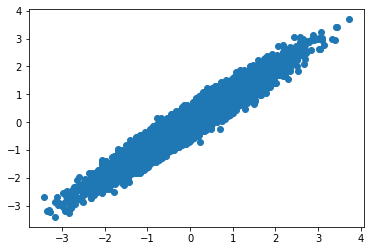

In [27]:
plt.scatter(X,y)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
x_train=cp.array(x_train)
y_train=cp.array(y_train)
x_test=cp.array(x_test)
y_test=cp.array(y_test)

## Definening Loss (cost) function
Mean square Error: 
$$ \frac{1}{N}\sum_{i=1}^{N}(y-yi)^2 $$

In [30]:
def mse(pred,y):
    return cp.mean((y-pred)**2)

w=cp.zeros((x_train.shape[1],1))
b=cp.zeros(1)
alpha=0.0001

In [31]:
for i in range(100):
    pred=cp.dot(x_train,w)+b
    L=mse(pred,y_train)
    j=(y_train-pred)
    dw=2*x_train.T.dot(j)
    db=cp.sum(2*j)
    w+=alpha*dw
    b+=b+alpha*db
    print(L)

1.016499253290088
0.4454336905191177
0.21509449581074733
0.12218240482750167
0.0847083119305285
0.06959097731974419
0.06349449253836419
0.06103464247857997
0.060042940509996374
0.05964261161959844
0.059481337468232885
0.059416157946039286
0.05938994869635359
0.05937932523967773
0.059375073037929556
0.059373337007939696
0.059372650019602784
0.05937236449946721
0.059372254678611465
0.0593722069861242
0.0593721899053478
0.05937218164614076
0.059372179184517496
0.05937217763918866
0.05937217736670724
0.0593721770339794
0.05937217704128504
0.059372176954355455
0.05937217697637261
0.059372176949001036
0.05937217696098455
0.059372176951195496
0.059372176956533955
0.059372176952789076
0.059372176955024523
0.059372176953547115
0.05937217695446217
0.05937217695387164
0.0593721769542429
0.05937217695400558
0.059372176954155684
0.0593721769540601
0.059372176954120705
0.05937217695408218
0.05937217695410663
0.05937217695409109
0.05937217695410096
0.05937217695409469
0.059372176954098674
0.059372176

In [32]:
test_pred=cp.dot(x_test,w)+b
acc=100-mse(test_pred,y_test)
acc

array(99.94193226)

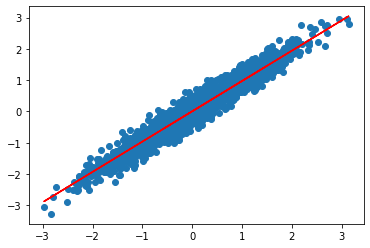

In [33]:
preds=cp.asnumpy(test_pred)
x_test=cp.asnumpy(x_test)
plt.scatter(x_test,cp.asnumpy(y_test))
plt.plot(x_test,preds,color="red")